# Compare Tcellularity and immune NACT NES through paired analysis

Script related to figure s7a

### Aim:
- Compare gene sets NES (matched and unmatched) using paired analysis

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro, kstest, ttest_rel, wilcoxon, mannwhitneyu, ttest_ind, bartlett, levene

In [2]:
home = '~/git_repos/HGSOC_TME_Heterogeneity/'

## Get sample labels

### Load file

In [4]:
file_keys = home + 'Data/5/NACT_SampleLabels.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds
Well,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in
A02,A02_3368B_Liver,3368,Treated,other,out
A03,A03_0371A_R_diaphragm,371,Untreated,other,out
A04,A04_0371B_R_diaphragm,371,Treated,other,out
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in


In [5]:
len(set(sample_labels.Case_mRNA))

28

In [6]:
matched = [3368,371,9717,8674,2359,564,7765,6965,9347]

sample_labels['Matched']=sample_labels['Case_mRNA'].isin(matched)

sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds,Matched
Well,,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in,True
A02,A02_3368B_Liver,3368,Treated,other,out,True
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,True
A04,A04_0371B_R_diaphragm,371,Treated,other,out,True
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,True


## Load hallmark ssGSEA results

In [7]:
file_nes = home + 'Data/5/HallmarksStromaImmune_NACT_NES.txt'

data_nes = pd.read_csv(file_nes, sep='\t')

data_nes.set_index('Term', inplace=True)

data_nes.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.092696,0.159109,0.221560,0.210024,0.099785,0.118758,0.100212,0.272152,0.108368,0.099014,...,0.166682,0.180770,0.182044,0.123420,0.167660,0.177934,0.175181,0.249246,0.163605,0.283639
HALLMARK_HYPOXIA,0.186010,0.196143,0.214819,0.237168,0.192770,0.204423,0.165283,0.278923,0.201645,0.195268,...,0.213112,0.231052,0.221524,0.238599,0.243462,0.232689,0.204692,0.258383,0.231907,0.286908
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.255208,0.282680,0.285083,0.260298,0.321267,0.309121,0.292943,0.313486,0.286084,0.277111,...,0.322881,0.262719,0.292338,0.381793,0.237000,0.292132,0.267533,0.301603,0.295406,0.393218
HALLMARK_MITOTIC_SPINDLE,0.305218,0.317705,0.293826,0.255306,0.278673,0.302507,0.298289,0.265211,0.338190,0.302091,...,0.292191,0.312170,0.317407,0.400398,0.324670,0.305270,0.306001,0.298000,0.302720,0.303047
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.218775,0.238017,0.212214,0.256485,0.252541,0.250670,0.242941,0.173667,0.262190,0.294071,...,0.245270,0.289621,0.233977,0.296323,0.177104,0.233127,0.223970,0.227052,0.261404,0.235832


### Check empty cells

In [8]:
set(data_nes.isnull().sum())

{0}

## Load mRNA tumour cellularity data

In [9]:
mRNA_tumcell_file = home + 'Data/5/NACT_log2exp_loess_norm_filtered_ESTIMATE.txt'

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

mRNA_tumcell.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,150.243978,100.962227,967.051900,808.453034,-65.569315,489.893858,490.720381,1061.377025,235.450362,418.150347,...,263.744096,464.939728,802.734452,153.081049,1103.804616,579.702569,788.616732,1237.456125,887.344608,501.153545
ImmuneScore,176.145317,526.978700,1297.193578,1203.727348,131.468582,650.323221,407.055460,1082.029608,88.028614,282.209677,...,481.526245,516.592649,582.005013,29.396052,908.321033,258.334588,849.462145,1496.053219,969.848566,621.394231
ESTIMATEScore,326.389295,627.940928,2264.245478,2012.180381,65.899267,1140.217080,897.775841,2143.406633,323.478976,700.360025,...,745.270341,981.532377,1384.739465,182.477100,2012.125649,838.037157,1638.078877,2733.509343,1857.193174,1122.547776
TumorPurity,0.794327,0.766668,0.591924,0.621334,0.816969,0.716267,0.740642,0.606127,0.794586,0.759799,...,0.755497,0.732326,0.690764,0.806982,0.621341,0.746506,0.663403,0.535046,0.638998,0.718075


### Add mRNA tumour cellularity to NES dataframe

In [10]:
data_nes_t = data_nes.T

In [11]:
data_nes_t['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity']

In [12]:
data_nes = data_nes_t.T

In [13]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_KRAS_SIGNALING_DN,-0.111366,-0.116319,-0.122007,-0.096597,-0.106269,-0.118997,-0.102549,-0.109274,-0.136147,-0.115405,...,-0.139325,-0.162815,-0.121599,-0.190920,-0.141080,-0.111751,-0.141831,-0.126286,-0.127925,-0.167178
HALLMARK_PANCREAS_BETA_CELLS,-0.146457,-0.171530,-0.229520,-0.139607,-0.137008,-0.151976,-0.239809,-0.162335,-0.164499,-0.187457,...,-0.228200,-0.152731,-0.218332,-0.196034,-0.157134,-0.126800,-0.179381,-0.216867,-0.193094,-0.209325
StromalSignature,0.068301,0.070667,0.269651,0.224186,0.023423,0.157401,0.155407,0.292664,0.095977,0.135368,...,0.104112,0.155909,0.228005,0.088713,0.296492,0.180196,0.221126,0.332099,0.245865,0.172484
ImmuneSignature,0.074691,0.169467,0.345730,0.317359,0.069114,0.197182,0.135779,0.299572,0.063372,0.103880,...,0.153753,0.167914,0.175292,0.058984,0.256096,0.108475,0.235833,0.393539,0.265829,0.201392
TumourCellularity_mRNA,0.794327,0.766668,0.591924,0.621334,0.816969,0.716267,0.740642,0.606127,0.794586,0.759799,...,0.755497,0.732326,0.690764,0.806982,0.621341,0.746506,0.663403,0.535046,0.638998,0.718075


In [15]:
data_nes.T.head()

Term,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,HALLMARK_APOPTOSIS,...,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_PEROXISOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_SPERMATOGENESIS,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_PANCREAS_BETA_CELLS,StromalSignature,ImmuneSignature,TumourCellularity_mRNA
A01,0.092696,0.186010,0.255208,0.305218,0.218775,0.319309,0.063204,0.283149,0.366102,0.293164,...,0.017703,0.157014,0.101102,0.059223,0.168870,-0.111366,-0.146457,0.068301,0.074691,0.794327
A02,0.159109,0.196143,0.282680,0.317705,0.238017,0.390819,0.120196,0.355469,0.367244,0.323681,...,0.013351,0.210357,0.187103,0.088553,0.199723,-0.116319,-0.171530,0.070667,0.169467,0.766668
A03,0.221560,0.214819,0.285083,0.293826,0.212214,0.323519,0.219716,0.279329,0.272018,0.368760,...,0.068881,0.159303,0.240944,-0.013733,0.262265,-0.122007,-0.229520,0.269651,0.345730,0.591924
A04,0.210024,0.237168,0.260298,0.255306,0.256485,0.275202,0.167111,0.246652,0.212474,0.323310,...,0.069575,0.211824,0.206219,0.075459,0.241376,-0.096597,-0.139607,0.224186,0.317359,0.621334
A05,0.099785,0.192770,0.321267,0.278673,0.252541,0.274844,0.080244,0.286553,0.344719,0.301616,...,0.046353,0.200961,0.113492,0.074904,0.125993,-0.106269,-0.137008,0.023423,0.069114,0.816969


In [16]:
#score = "ImmuneSignature"
score = "TumourCellularity_mRNA"

In [17]:
im_nes_df = pd.concat(
    [sample_labels['Matched'],
    sample_labels['NACT'],
    data_nes.T[score]],
    axis=1
)

im_nes_df.head()

,Matched,NACT,TumourCellularity_mRNA
Well,,,
A01,True,Untreated,0.794327
A02,True,Treated,0.766668
A03,True,Untreated,0.591924
A04,True,Treated,0.621334
A05,True,Untreated,0.816969


In [18]:
untreated_df = im_nes_df[im_nes_df["NACT"] == "Untreated"]
treated_df = im_nes_df[im_nes_df["NACT"] == "Treated"]

In [22]:
bartlett(
    untreated_df[untreated_df["Matched"] == True][score],
    untreated_df[untreated_df["Matched"] == False][score]
)
# same variance

BartlettResult(statistic=1.0636895859970412, pvalue=0.3023751819154189)

In [23]:
levene(
    untreated_df[untreated_df["Matched"] == True][score],
    untreated_df[untreated_df["Matched"] == False][score]
)
# same variance

LeveneResult(statistic=0.5368938398490323, pvalue=0.4702777014377597)

In [24]:
shapiro(untreated_df[untreated_df["Matched"] == True][score])

(0.8408161401748657, 0.058974139392375946)

In [25]:
shapiro(untreated_df[untreated_df["Matched"] == False][score])

(0.9127862453460693, 0.0832914263010025)

In [28]:
mean = np.mean(untreated_df[untreated_df["Matched"]==True][score])
std = np.std(untreated_df[untreated_df["Matched"]==True][score])

kstest(list(untreated_df[untreated_df["Matched"]==True][score]),
       'norm', args=(mean,std))


KstestResult(statistic=0.24387978698439655, pvalue=0.5901700775401482)

In [29]:
mean = np.mean(untreated_df[untreated_df["Matched"]==False][score])
std = np.std(untreated_df[untreated_df["Matched"]==False][score])

kstest(list(untreated_df[untreated_df["Matched"]==False][score]),
       'norm', args=(mean,std))


KstestResult(statistic=0.11720971345690101, pvalue=0.9565382413024685)

In [30]:
ttest_ind(
    untreated_df[untreated_df["Matched"]==True][score],
    untreated_df[untreated_df["Matched"]==False][score],
    equal_var=True
)


Ttest_indResult(statistic=1.1819797214105436, pvalue=0.2479116008203142)

In [31]:
mannwhitneyu(
    untreated_df[untreated_df["Matched"] == True][score],
    untreated_df[untreated_df["Matched"] == False][score], alternative='two-sided'
)

MannwhitneyuResult(statistic=114.0, pvalue=0.16839692203854006)

In [32]:
score

'TumourCellularity_mRNA'

In [33]:
# treated

In [34]:
bartlett(
    treated_df[treated_df["Matched"] == True][score],
    treated_df[treated_df["Matched"] == False][score]
)
# same variance

BartlettResult(statistic=0.19061320081116814, pvalue=0.662406745157833)

In [35]:
levene(
    treated_df[treated_df["Matched"] == True][score],
    treated_df[treated_df["Matched"] == False][score]
)
# same variance

LeveneResult(statistic=0.6341060735084465, pvalue=0.43306435953738565)

In [36]:
shapiro(treated_df[treated_df["Matched"] == True][score])

(0.7960711717605591, 0.01841529831290245)

In [37]:
shapiro(treated_df[treated_df["Matched"] == False][score])

(0.9190979599952698, 0.10890509188175201)

In [38]:
mean = np.mean(treated_df[treated_df["Matched"]==True][score])
std = np.std(treated_df[treated_df["Matched"]==True][score])

kstest(list(treated_df[treated_df["Matched"]==True][score]),
       'norm', args=(mean,std))

KstestResult(statistic=0.31746318823051045, pvalue=0.2635841803177216)

In [39]:
mean = np.mean(treated_df[treated_df["Matched"]==False][score])
std = np.std(treated_df[treated_df["Matched"]==False][score])

kstest(list(treated_df[treated_df["Matched"]==False][score]),
       'norm', args=(mean,std))

KstestResult(statistic=0.18384400644042248, pvalue=0.49218133352564)

In [40]:
ttest_ind(
    treated_df[treated_df["Matched"] == True][score],
    treated_df[treated_df["Matched"] == False][score],
    equal_var=True
)

Ttest_indResult(statistic=-1.5265797639975707, pvalue=0.13893996517390572)

In [41]:
mannwhitneyu(
    treated_df[treated_df["Matched"] == True][score],
    treated_df[treated_df["Matched"] == False][score]
)

MannwhitneyuResult(statistic=55.0, pvalue=0.07000458192059181)

In [42]:
def boxplot(data_toplot, score, ylim=None):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(3,3)

    sns.violinplot(x="Matched",
                   y=score,
                   data=data_toplot,
                   inner=None,
                   hue="Matched",
                   split=False,
                   scale="count",
                   scale_hue=False,
                   zorder=0)

    sns.boxplot(x='Matched',
                y=score,
                data=data_toplot,
                notch=True,
                fliersize=0,
                width=0.5,
                hue="Matched",
                zorder=1,
                whis=0)

    
    
    if ylim != None:
        plt.ylim(ylim)
        
    #sns.despine(trim=True,offset=10)
    ax.get_legend().remove()
    
    return fig

In [43]:
score = "ImmuneSignature"

In [51]:
im_nes_df = pd.concat(
    [sample_labels['Matched'],
    sample_labels['NACT'],
    data_nes.T[score]],
    axis=1
)

im_nes_df["Matched"].replace([True,False], ["Matched","Unmatched"], inplace=True)

im_nes_df.head()

,Matched,NACT,ImmuneSignature
Well,,,
A01,Matched,Untreated,0.074691
A02,Matched,Treated,0.169467
A03,Matched,Untreated,0.345730
A04,Matched,Treated,0.317359
A05,Matched,Untreated,0.069114


In [52]:
df = im_nes_df[im_nes_df["NACT"] == "Treated"]

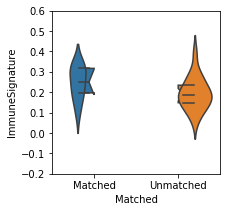

In [53]:
fig = boxplot(df, score, ylim=[-0.2,0.6])

In [49]:
score

'ImmuneSignature'

In [55]:
fig.savefig("../../Figures/supplementary/7/panels/s7a_post-NACT_"+score+".pdf")

In [56]:
df = im_nes_df[im_nes_df["NACT"] == "Untreated"]

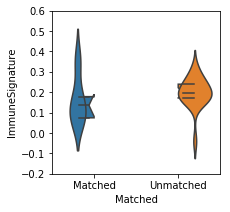

In [57]:
fig = boxplot(df, score, ylim=[-0.2,0.6])

In [58]:
fig.savefig("../../Figures/supplementary/7/panels/s7a_pre-NACT_"+score+".pdf")

In [59]:
score = "TumourCellularity_mRNA"

In [60]:
im_nes_df = pd.concat(
    [sample_labels['Matched'],
    sample_labels['NACT'],
    data_nes.T[score]],
    axis=1
)

im_nes_df["Matched"].replace([True,False], ["Matched","Unmatched"], inplace=True)

im_nes_df.head()

,Matched,NACT,TumourCellularity_mRNA
Well,,,
A01,Matched,Untreated,0.794327
A02,Matched,Treated,0.766668
A03,Matched,Untreated,0.591924
A04,Matched,Treated,0.621334
A05,Matched,Untreated,0.816969


In [71]:
df = im_nes_df[im_nes_df["NACT"] == "Treated"]

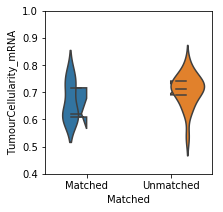

In [72]:
fig = boxplot(df, score, ylim=[0.4,1])

In [73]:
fig.savefig("../../Figures/supplementary/7/panels/s7a_post-NACT_"+score+".pdf")

In [74]:
df = im_nes_df[im_nes_df["NACT"] == "Untreated"]

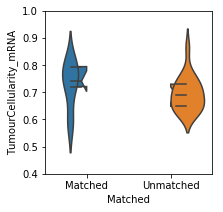

In [75]:
fig = boxplot(df, score, ylim=[0.4,1])

In [76]:
fig.savefig("../../Figures/supplementary/7/panels/s7a_pre-NACT_"+score+".pdf")

# End script